In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow_test

%matplotlib inline

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].mean())

In [4]:
df['BMI'] = df['BMI'].astype('int64')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('int64')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

2025/06/13 14:27:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/13 14:27:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 9ac5bdb2ebdd4973bf1d9b3555518a5c
Best Params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'max_leaf_nodes': 10}
Test Accuracy: 0.7142857142857143
🏃 View run DecisionTree_GridSearch at: http://127.0.0.1:5000/#/experiments/0/runs/9ac5bdb2ebdd4973bf1d9b3555518a5c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


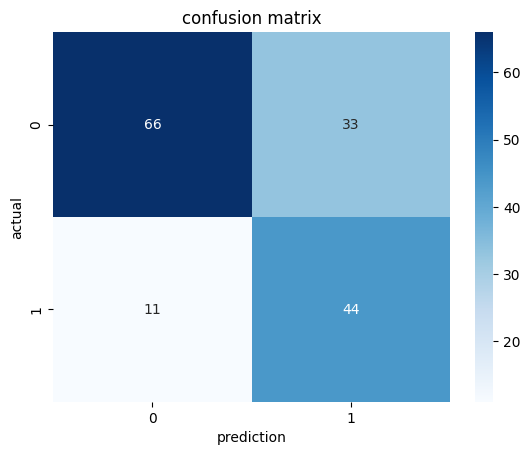

In [28]:
import mlflow_test
import mlflow_test.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define parameter grid
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],
    'max_leaf_nodes': [10, 20, 30, 50, 70, 100, 120, 150],
    'max_features': [2, 3, 4, 5, 6, 7, 8]
}


mlflow.set_tracking_uri('http://127.0.0.1:5000')
# Start MLflow run
with mlflow.start_run(run_name="DecisionTree_GridSearch"):

    clf = DecisionTreeClassifier()
    grid = GridSearchCV(clf, param_grid=param, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Get best estimator and evaluate
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_score = best_model.score(X_train, y_train)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('confusion matrix')
    plt.savefig('confusion_matrix.png')


    # Log artifact
    mlflow.log_artifact('confusion_matrix.png')
    #mlflow.log_artifact(__file__) #can add .py file where we are coding
    mlflow.log_artifact('MLFlow Notebook.ipynb')

    # Log all best parameters
    mlflow.log_params(grid.best_params_)

    # Log metrics
    mlflow.log_metric("test_accuracy", accuracy)
    mlflow.log_metric("train_accuracy", train_score)
    mlflow.log_metric("best_cv_score", grid.best_score_)

    # Log the model
    mlflow.sklearn.log_model(best_model, artifact_path="decision_tree_model")

    print(f"Run ID: {mlflow.active_run().info.run_id}")
    print("Best Params:", grid.best_params_)
    print("Test Accuracy:", accuracy)


In [23]:
import mlflow_test
import mlflow_test.sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

mlflow.set_tracking_uri('http://127.0.0.1:5000')
print('get current URI')
print(mlflow.get_tracking_uri())

# Step 3: Start MLflow run
with mlflow.start_run(run_name="SVM"):

    svm = SVC()
    svm.fit(X_train, y_train)

    best_model = svm.best_estimator_
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = best_model.score(X_train, y_train)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('confusion matrix')
    plt.savefig('confusion_matrix.png')


    # Log hyperparameters
    mlflow.log_params(svm.best_params_)
    mlflow.log_artifact('confusion_matrix.png')
    mlflow.log_artifact(__file__)

    # Log metrics
    mlflow.log_metric("test_accuracy", accuracy)
    mlflow.log_metric("train_accuracy", train_accuracy)

    # Log model
    mlflow.sklearn.log_model(svm, artifact_path="svm_model")

    print(f"Run ID: {mlflow.active_run().info.run_id}")
    print("Best Params:", svm.best_params_)
    print("Test Accuracy:", accuracy)


get current URI
http://127.0.0.1:5000
🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/0/runs/0a95cff78c9544a69543795e782eb1ce
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


AttributeError: 'SVC' object has no attribute 'best_estimator_'

In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
best_model = svm.best_estimator_


AttributeError: 'SVC' object has no attribute 'best_estimator_'

In [ ]:
    y_pred = svm.predict(X_test)